In [77]:
import pandas as pd  # Pandas; open source data analysis/manipulation tool library
import numpy as np  # NumPy; used to work with arrays, can also be used to use mathematics and perform data analysis
import matplotlib.pyplot as plot  # Matplotlib; visualization/modelling library
import seaborn as sns  # Matplotlib based library, simplifies the process of visualisation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [47]:
#--- Questions/Variables ---#
# 1) How old are you?                                                                                                                     object
# 2) What gender are you?                                                                                                                 object
# 3) What technology do you own that involves screens/monitors?                                                                           object
# 4) Would you say, you are comfortable with using technology?                                                                            object
# 5) With all the technology you own, collectively, how much time do you spend on it each day on average?                                 object
# 6) What is your main purpose of using screen technology?                                                                                object
# 7) Would you say that screen technology made our lives way easier?                                                                      object
# 8) Did screen technology affect your sleep quality and patterns? If so, was it in a positive or negative way?                           object
# 9) Have you noticed any impact on your physical health from the use of screen technology? (e.g. eye strain, headaches etc..)            object
# 10) Has screen technology usage has an impact on your social relationships, or sense of community?                                      object
# 11) Did screen technology use affected your productivity or ability to focus? If so, was it in a positive or negative way?              object
# 12) How does screen technology usage impacts your mental health and well-being?  If so, is it in a positive or negative way?            object
# 13) Do you feel like you have control over your screen technology usage? Or perhaps, it controls you instead?                           object
# 14) Do you believe there are any long-term effects of screen technology use that have not yet been discovered?                          object
# 15) In what ways do you think screen technology has positively or negatively impacted society as a whole? (Leave blank if no answer)    object
# 16) What changes would you like to see in the way screen technology is designed or used in the future? (Leave blank if no answer)       object

In [49]:
survey = pd.read_csv("data.csv")

In [51]:
new_col_names = { # Renaming the questions into more simpler terms to reduce clutter in visualisations
    '1) How old are you?': 'age',
    '2) What gender are you?': 'gender',
    '3) What technology do you own that involves screens/monitors?': 'technology',
    '4) Would you say, you are comfortable with using technology?': 'comfortable-tech',
    '5) With all the technology you own, collectively, how much time do you spend on it each day on average?': 'screen-time',
    '6) What is your main purpose of using screen technology?': 'purpose',
    '7) Would you say that screen technology made our lives way easier?': 'easier-life',
    '8) Did screen technology affect your sleep quality and patterns? If so, was it in a positive or negative way?': 'sleep-quality',
    '9) Have you noticed any impact on your physical health from the use of screen technology? (e.g. eye strain, headaches etc..)': 'physical',
    '10) Has screen technology usage has an impact on your social relationships, or sense of community?': 'social',
    '11) Did screen technology use affected your productivity or ability to focus? If so, was it in a positive or negative way?': 'productivity',
    '12) How does screen technology usage impacts your mental health and well-being?  If so, is it in a positive or negative way?': 'mental',
    '13) Do you feel like you have control over your screen technology usage? Or perhaps, it controls you instead?': 'control',
    '14) Do you believe there are any long-term effects of screen technology use that have not yet been discovered?': 'undiscovered-longimpact?'
}

In [53]:
survey = survey.rename(columns=new_col_names)  # Applying new names
survey = survey.drop(survey.columns[[0, 3, 6, 15, 16]], axis=1)  # Dropping unnecessary column; Timestamp and two open-ended questions, not needed for analysis

In [55]:
# -------------------- Changing answers in columns to numerics for easier analysis --------------------
mapping = {'I control it': 1, 'It controls me': 0, 'Prefer not to say': 999}
mapping1 = {'Extremely comfortable': 4, 'Very comfortable': 3, 'Somewhat comfortable': 2, 'Not comfortable at all': 1, 'Prefer not to say': 0}
mapping2 = {'Very positively': 5, 'Somewhat positively': 4, 'Did not affected it at all': 3, 'Somewhat negatively': 2, 'Very negatively': 1, 'Prefer not to say': 0}
mapping3 = {'Very positively': 5, 'Somewhat positively': 4, 'Did not affected at all': 3, 'Somewhat negatively': 2, 'Very negatively': 1, 'Prefer not to say': 0}
mapping4 = {'Yes': 1, 'No': 0, 'Maybe': 0.5, 'Prefer not to say': 999}
mapping5 = {'0-2 hours': 1, '3-5 hours': 2, '6-8 hours': 3, '9-10 hours': 4, '10 hours or more': 5}
# -----------------------------------------------------------------------------------------------------

In [57]:
# -------------------- Utilising the map method to find specific answers in each designated column and swap them --------------------
survey['control'] = survey['control'].map(mapping)
survey['screen-time'] = survey['screen-time'].map(mapping5)
survey['comfortable-tech'] = survey['comfortable-tech'].map(mapping1)
survey['sleep-quality'] = survey['sleep-quality'].map(mapping2)
survey['physical'] = survey['physical'].map(mapping4)
survey['social'] = survey['social'].map(mapping4)
survey['productivity'] = survey['productivity'].map(mapping3)
survey['mental'] = survey['mental'].map(mapping3)
survey['undiscovered-longimpact?'] = survey['undiscovered-longimpact?'].map(mapping4)
# -----------------------------------------------------------------------------------------------------------------------------------

In [59]:
# -------------------- Changing the data types of the changed answers to proper numeric data type --------------------
survey['control'] = survey['control'] = pd.to_numeric(survey['control'], errors='coerce')
survey['screen-time'] = survey['screen-time'] = pd.to_numeric(survey['screen-time'], errors='coerce')
survey['comfortable-tech'] = survey['comfortable-tech'] = pd.to_numeric(survey['comfortable-tech'], errors='coerce')
survey['sleep-quality'] = survey['sleep-quality'] = pd.to_numeric(survey['sleep-quality'], errors='coerce')
survey['physical'] = survey['physical'] = pd.to_numeric(survey['physical'], errors='coerce')
survey['social'] = survey['social'] = pd.to_numeric(survey['social'], errors='coerce')
survey['productivity'] = survey['productivity'] = pd.to_numeric(survey['productivity'], errors='coerce')
survey['mental'] = survey['mental'] = pd.to_numeric(survey['mental'], errors='coerce')
survey['undiscovered-longimpact?'] = survey['undiscovered-longimpact?'] = pd.to_numeric(survey['undiscovered-longimpact?'], errors='coerce')
# --------------------------------------------------------------------------------------------------------------------

In [61]:
survey.to_csv('survey.csv', index=False)  # Creating new .csv file with changes

In [63]:
print("------------------------") # Confirming correct data types
print("Types of data:")
print(survey.dtypes)
print("------------------------")

------------------------
Types of data:
age                          object
gender                       object
comfortable-tech              int64
screen-time                   int64
easier-life                  object
sleep-quality                 int64
physical                    float64
social                      float64
productivity                float64
mental                      float64
control                       int64
undiscovered-longimpact?    float64
dtype: object
------------------------


In [65]:
# -------------- Modifying the display in the file to fit the size --------------
width = 175
pd.set_option('display.width', width)
np.set_printoptions(linewidth=width)
pd.set_option('display.max_columns', 12)
# -------------------------------------------------------------------------------

In [79]:
label_encoder = LabelEncoder()
survey_encoded = survey.copy()
for column in survey_encoded.select_dtypes(include=['object']).columns:
    survey_encoded[column] = label_encoder.fit_transform(survey_encoded[column])

survey.fillna(999, inplace=True)  # "999" is a "prefer not to say" answer, which is invalid. Changing it to NaN.
survey.dropna(inplace=True)  #Getting rid of NaN values
print(survey.head(10))  #Getting an idea of how the dataset looks like by printing out the first 10 records

     age      gender  comfortable-tech  screen-time easier-life  sleep-quality  physical  social  productivity  mental  control  undiscovered-longimpact?
0  25-34      Female                 3            4         Yes              2       0.5     0.5           4.0     2.0        1                       0.5
1  18-24        Male                 1            2         Yes              2       0.5     0.5           3.0     3.0        1                       1.0
2  25-34        Male                 2            4         Yes              2       0.0     0.0           2.0     2.0        1                       0.5
3  18-24      Female                 4            3         Yes              2       1.0     0.0           1.0     3.0        0                       0.5
4  18-24      Female                 4            2         Yes              1       1.0     1.0         999.0   999.0        1                       1.0
5  18-24      Female                 3            5         Yes             

In [69]:
print("Numerical statistics:")  #Quick glance at statistical analysis
print(survey.describe())

Numerical statistics:
       comfortable-tech  screen-time  sleep-quality   physical     social  productivity     mental     control  undiscovered-longimpact?
count         82.000000    82.000000      82.000000  82.000000  82.000000     82.000000   82.00000   82.000000                 82.000000
mean           3.097561     3.609756       1.914634   0.670732   0.567073     14.682927   14.47561   12.707317                  0.682927
std            0.963658     1.173326       0.788830   0.394558   0.421360    110.047339  110.06970  110.263600                  0.266576
min            1.000000     1.000000       1.000000   0.000000   0.000000      1.000000    0.00000    0.000000                  0.000000
25%            3.000000     3.000000       1.000000   0.500000   0.000000      2.000000    2.00000    0.000000                  0.500000
50%            3.000000     4.000000       2.000000   1.000000   0.500000      2.000000    2.00000    1.000000                  0.500000
75%            4.00

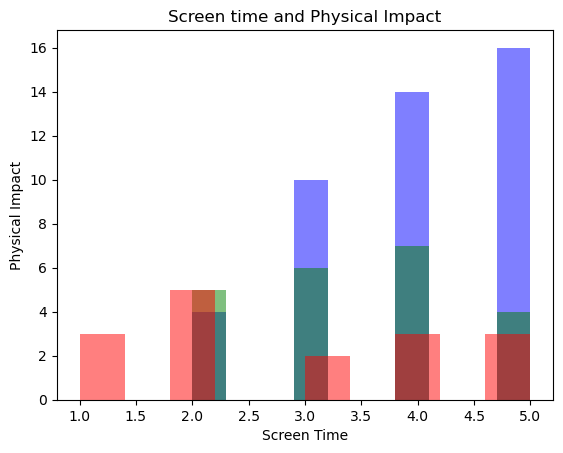

In [71]:
colors = {0: 'green', 0.5: 'yellow', 1: 'red'}
plot.hist(survey[survey['physical'] == 1]['screen-time'], color='blue', alpha=0.5, label='Physical impact = High')
plot.hist(survey[survey['physical'] == 0.5]['screen-time'], color='green', alpha=0.5, label='Physical impact = Medium')
plot.hist(survey[survey['physical'] == 0]['screen-time'], color='red', alpha=0.5, label='Physical impact = Low')
plot.title("Screen time and Physical Impact")
plot.xlabel("Screen Time")
plot.ylabel("Physical Impact")
plot.show()

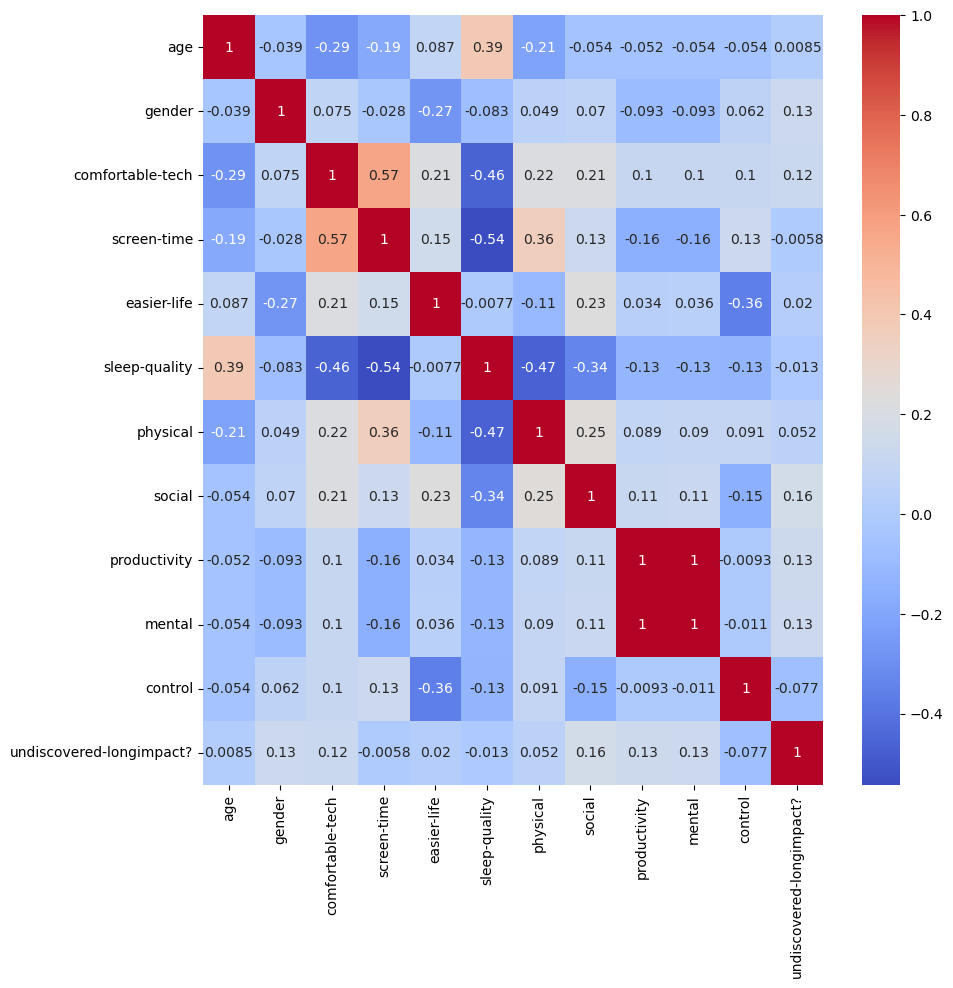

In [83]:
heatmap = survey_encoded.corr()  #Heatmap correlation
plot.figure(figsize=(10, 10))
sns.heatmap(heatmap, annot=True, cmap="coolwarm")
plot.show()

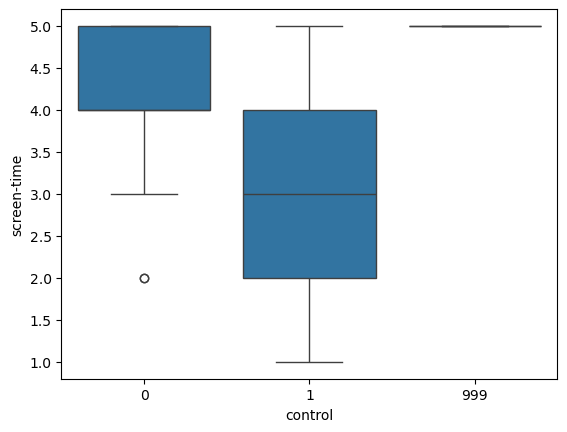

In [85]:
sns.boxplot(x=survey['control'], y=survey['screen-time'])  #Box plot to see distribution of screen time and control
plot.show()

Counting each screen-time response..:
0 to 2 hours =  3
3 to 5 hours =  14
6 to 8 hours =  18
9 to 10 hours =  24
10 hours or more =  23


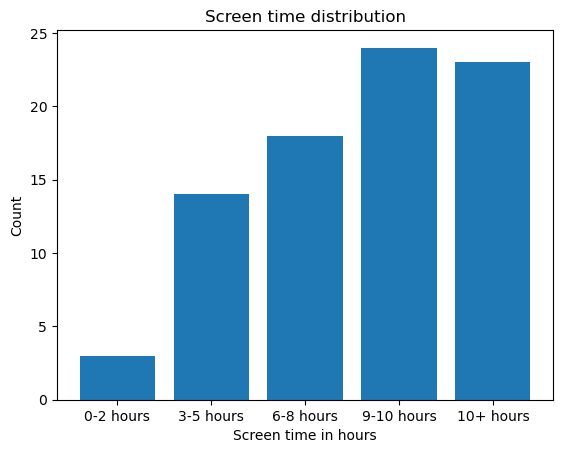

In [87]:
#Screen time is the most important variable here, counting all the results for each answer and visualising them
print("Counting each screen-time response..:")
print("0 to 2 hours = ", (survey['screen-time'] == 1).sum())
print("3 to 5 hours = ", (survey['screen-time'] == 2).sum())
print("6 to 8 hours = ", (survey['screen-time'] == 3).sum())
print("9 to 10 hours = ", (survey['screen-time'] == 4).sum())
print("10 hours or more = ", (survey['screen-time'] == 5).sum())

hours_counts = [(survey['screen-time'] == 1).sum(),
                (survey['screen-time'] == 2).sum(),
                (survey['screen-time'] == 3).sum(),
                (survey['screen-time'] == 4).sum(),
                (survey['screen-time'] == 5).sum()]

hours_labels = ['0-2 hours', '3-5 hours', '6-8 hours', '9-10 hours', '10+ hours']
plot.bar(hours_labels, hours_counts)
plot.xlabel('Screen time in hours')
plot.ylabel('Count')
plot.title('Screen time distribution')
plot.show()

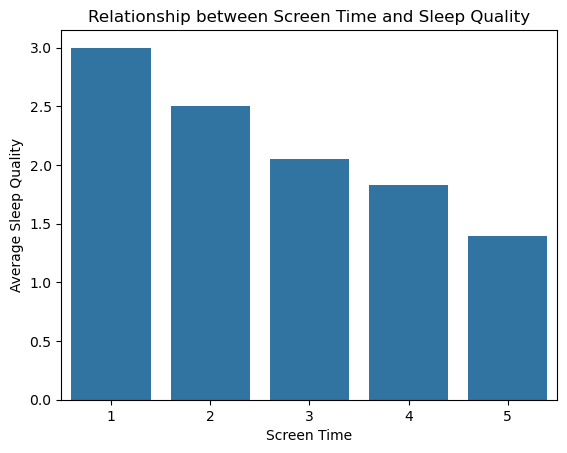

In [89]:
invalid = survey[survey['screen-time'] != 0]
invalid1 = survey[survey['sleep-quality'] != 0]
grouped_data = invalid.groupby('screen-time')['sleep-quality'].mean()
sns.barplot(x=grouped_data.index, y=grouped_data.values)
plot.xlabel('Screen Time')
plot.ylabel('Average Sleep Quality')
plot.title('Relationship between Screen Time and Sleep Quality')
plot.show()

In [91]:
print("------------------------")
print("Users reporting the screen controlling them (addiction) = ", (survey.control == 1).sum())
print("Users reporting the screen NOT controlling them = ", (survey.control == 0).sum())
print("------------------------")

------------------------
Users reporting the screen controlling them (addiction) =  43
Users reporting the screen NOT controlling them =  38
------------------------


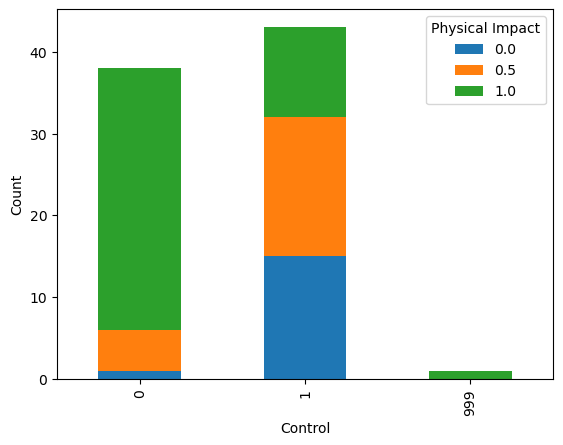

In [93]:
#Physical impact and the screen time controlling them, given that screen-time increases the chances of the screen controlling them.
cross_tab = pd.crosstab(survey['control'], survey['physical'])
cross_tab.plot(kind='bar', stacked=True)
plot.xlabel('Control')
plot.ylabel('Count')
plot.legend(title='Physical Impact')
plot.show()

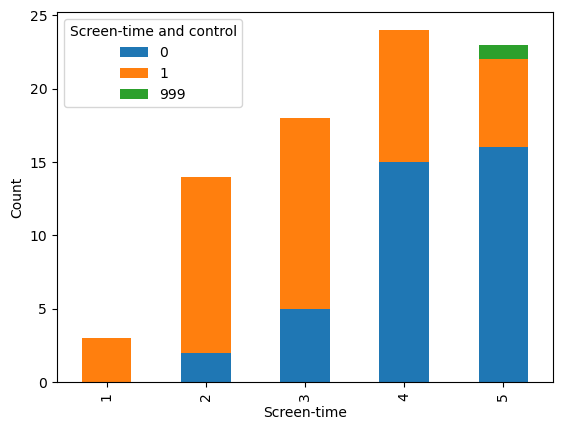

In [95]:
#  Further clarification for screen-time and control
cross_tab = pd.crosstab(survey['screen-time'], survey['control'])
cross_tab.plot(kind='bar', stacked=True)
plot.xlabel('Screen-time')
plot.ylabel('Count')
plot.legend(title='Screen-time and control')
plot.show()

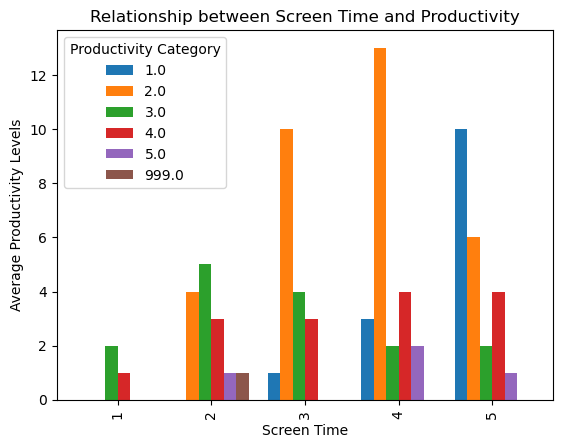

In [97]:
invalid = survey[survey['screen-time'] != 0]
invalid1 = survey[survey['productivity'] != 0]
grouped_data = invalid.groupby(['screen-time', 'productivity']).size().unstack()
grouped_data.plot(kind='bar', width=0.8)
plot.xlabel('Screen Time')
plot.ylabel('Average Productivity Levels')
plot.title('Relationship between Screen Time and Productivity')
plot.legend(title='Productivity Category')
plot.show()

In [99]:
#Logistic Regression
survey_data = survey[['screen-time', 'mental']]
survey = survey.dropna()

X = survey[['screen-time']]
y = survey['mental']


def logistic_regression_analysis(X, y):
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    y_pred = logreg.predict(X_test)
    report = classification_report(y_test, y_pred, zero_division=1)
    print(report)


bins = [0, 0.5, 1]
labels = ['No', 'Yes']
survey['physical'] = pd.cut(survey['physical'], bins=bins + [1], labels=labels, duplicates='drop')
survey['physical'] = survey['physical'].cat.set_categories(labels)

survey['physical'].fillna('No', inplace=True)
logistic_regression_analysis(X, y)
logistic_regression_analysis(survey[['screen-time']], survey['physical'])
logistic_regression_analysis(survey[['screen-time']], survey['control'])
logistic_regression_analysis(survey[['screen-time']], survey['productivity'])
logistic_regression_analysis(survey[['screen-time']], survey['sleep-quality'])

Accuracy: 0.4117647058823529
              precision    recall  f1-score   support

         1.0       1.00      0.00      0.00         3
         2.0       0.50      0.62      0.56         8
         3.0       0.29      0.50      0.36         4
         4.0       1.00      0.00      0.00         1
       999.0       1.00      0.00      0.00         1

    accuracy                           0.41        17
   macro avg       0.76      0.23      0.18        17
weighted avg       0.60      0.41      0.35        17

Accuracy: 0.6470588235294118
              precision    recall  f1-score   support

          No       0.57      0.57      0.57         7
         Yes       0.70      0.70      0.70        10

    accuracy                           0.65        17
   macro avg       0.64      0.64      0.64        17
weighted avg       0.65      0.65      0.65        17

Accuracy: 0.6470588235294118
              precision    recall  f1-score   support

           0       0.60      0.75      0.6

C:\Users\stepn\AppData\Local\Temp\ipykernel_18400\2814364913.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  survey['physical'].fillna('No', inplace=True)
